# Serie A 2021-2022 Table

#### Sepideh Nazemi

In [1]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

- In this notebook, I have extracted detailed information and stats about each game in Serie A league and provided an overview table about games.
- In addition, I provided a function that illustrates a team's position throughout the tournament.

- The web address I use to scrap data from is https://understat.com


In [2]:
# create base url
base_url = 'https://understat.com/league' 

In [3]:
leagues = ['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1', 'RFPL'] 
seasons = ['2019', '2020','2021']

- Focusing on Serie A 2021-22 I will use the following URL: https://understat.com/league/Serie_A/2021


In [4]:
url = base_url+'/'+leagues[3]+'/'+seasons[2] 

- Inspecting the structure of the webpage, it seams that the related data (i.e, teamsData ) is in the Json variable under 'script' tag.

In [5]:
res = requests.get(url) 
soup = BeautifulSoup(res.content, "lxml")
scripts = soup.find_all('script')

In [6]:
#scripts

In [7]:
import json 
string_with_json_obj = '' 
# Find data for teams 
for el in scripts: 
    if 'teamsData' in el.text: 
        string_with_json_obj = el.text.strip()
# print(string_with_json_obj)
# strip unnecessary symbols and get only JSON data 
ind_start = string_with_json_obj.index("('")+2 
ind_end = string_with_json_obj.index("')") 
json_data = string_with_json_obj[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

In [8]:
data = json.loads(json_data)

In [9]:
#Investigat the structure of data
print(data.keys())
print('='*50)
print(data['108'].keys())
print('='*50)
print(data['108']['id'])
print('='*50)
print(data['108']['title'])
print('='*50)
print(data['108']['history'][0])

dict_keys(['94', '95', '96', '97', '98', '99', '101', '102', '104', '105', '106', '107', '108', '110', '111', '113', '116', '260', '264', '265'])
dict_keys(['id', 'title', 'history'])
108
Empoli
{'h_a': 'h', 'xG': 1.13436, 'xGA': 1.78152, 'npxG': 1.13436, 'npxGA': 1.02023, 'ppda': {'att': 320, 'def': 39}, 'ppda_allowed': {'att': 221, 'def': 25}, 'deep': 12, 'deep_allowed': 12, 'scored': 1, 'missed': 3, 'xpts': 0.8331999999999999, 'result': 'l', 'date': '2021-08-21 18:45:00', 'wins': 0, 'draws': 0, 'loses': 1, 'pts': 0, 'npxGD': 0.11413000000000006}


In [10]:
# Get teams and their relevant ids and put them into separate dictionary
teams = {}
for id in data.keys():
    teams[id] = data[id]['title']

In [11]:
teams

{'94': 'Verona',
 '95': 'Roma',
 '96': 'Lazio',
 '97': 'Bologna',
 '98': 'Juventus',
 '99': 'Udinese',
 '101': 'Genoa',
 '102': 'Sampdoria',
 '104': 'Sassuolo',
 '105': 'Napoli',
 '106': 'Inter',
 '107': 'Atalanta',
 '108': 'Empoli',
 '110': 'Fiorentina',
 '111': 'AC Milan',
 '113': 'Torino',
 '116': 'Cagliari',
 '260': 'Spezia',
 '264': 'Salernitana',
 '265': 'Venezia'}

In [12]:
# EDA to get a feeling of how the JSON is structured
# Column names are all the same, so we just use first element
columns = []
# Check the sample of values per each column
values = []
for id in data.keys():
    columns = list(data[id]['history'][0].keys())
    values = list(data[id]['history'][0].values())
    break

print(columns)
print(values)

['h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'ppda', 'ppda_allowed', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins', 'draws', 'loses', 'pts', 'npxGD']
['h', 2.25155, 1.86679, 1.49026, 1.86679, {'att': 358, 'def': 27}, {'att': 160, 'def': 10}, 10, 4, 2, 3, 1.6755, 'l', '2021-08-21 16:30:00', 0, 0, 1, 0, -0.37653000000000003]


In [13]:
Empoli_data = []
for row in data['108']['history']:
    Empoli_data.append(list(row.values()))
df = pd.DataFrame(Empoli_data, columns=columns)
#df

In [14]:
# Getting data for all teams
dataframes = {}
for id, team in teams.items():
    teams_data = []
    for row in data[id]['history']:
        teams_data.append(list(row.values()))
    
    df = pd.DataFrame(teams_data, columns=columns)
    dataframes[team] = df
    print('Added data for {}.'.format(team))
  

Added data for Verona.
Added data for Roma.
Added data for Lazio.
Added data for Bologna.
Added data for Juventus.
Added data for Udinese.
Added data for Genoa.
Added data for Sampdoria.
Added data for Sassuolo.
Added data for Napoli.
Added data for Inter.
Added data for Atalanta.
Added data for Empoli.
Added data for Fiorentina.
Added data for AC Milan.
Added data for Torino.
Added data for Cagliari.
Added data for Spezia.
Added data for Salernitana.
Added data for Venezia.


In [15]:
df.shape

(28, 19)

In [16]:
# Sample check of our newly created DataFrame
dataframes['Bologna'].head()

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,h,1.725770,1.637110,1.725770,0.875808,"{'att': 60, 'def': 23}","{'att': 294, 'def': 22}",9,5,3,2,1.4291,w,2021-08-22 16:30:00,1,0,0,3,0.849962
1,a,0.419870,0.989249,0.419870,0.989249,"{'att': 243, 'def': 20}","{'att': 192, 'def': 31}",1,9,0,0,0.7958,d,2021-08-28 16:30:00,0,1,0,1,-0.569379
2,h,1.255120,0.315142,1.255120,0.315142,"{'att': 245, 'def': 30}","{'att': 139, 'def': 32}",6,5,1,0,2.2279,w,2021-09-13 18:45:00,1,0,0,3,0.939978
3,a,0.855616,4.280110,0.855616,4.280110,"{'att': 248, 'def': 23}","{'att': 307, 'def': 11}",2,10,1,6,0.0535,l,2021-09-18 16:00:00,0,0,1,0,-3.424494
4,h,2.288100,1.698810,1.526800,0.937512,"{'att': 191, 'def': 26}","{'att': 297, 'def': 17}",10,2,2,2,1.8365,d,2021-09-21 16:30:00,0,1,0,1,0.589288


In [17]:
#dataframes

In [18]:
for team, df in dataframes.items():
    dataframes[team]['ppda_coef'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
    dataframes[team]['oppda_coef'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
#And check how our new dataframes look based on Sevilla dataframe
dataframes['Atalanta']

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,...,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,oppda_coef
0,a,1.013430,0.864837,1.013430,0.864837,"{'att': 184, 'def': 24}","{'att': 231, 'def': 29}",3,3,2,...,1.5260,w,2021-08-21 18:45:00,1,0,0,3,0.148593,7.666667,7.965517
1,h,0.989249,0.419870,0.989249,0.419870,"{'att': 192, 'def': 31}","{'att': 243, 'def': 20}",9,1,0,...,1.8401,d,2021-08-28 16:30:00,0,1,0,1,0.569379,6.193548,12.150000
2,h,2.115260,1.814650,1.354000,0.292053,"{'att': 258, 'def': 21}","{'att': 290, 'def': 23}",10,3,1,...,1.5536,l,2021-09-11 18:45:00,0,0,1,0,1.061947,12.285714,12.608696
3,a,1.382990,0.792486,1.382990,0.792486,"{'att': 171, 'def': 25}","{'att': 292, 'def': 22}",11,3,1,...,1.9041,w,2021-09-18 18:45:00,1,0,0,3,0.590504,6.840000,13.272727
4,h,2.108130,0.911464,2.108130,0.911464,"{'att': 285, 'def': 38}","{'att': 246, 'def': 23}",11,4,2,...,2.2723,w,2021-09-21 18:45:00,1,0,0,3,1.196666,7.500000,10.695652
5,a,1.502370,3.520910,1.502370,2.759610,"{'att': 214, 'def': 21}","{'att': 199, 'def': 13}",6,4,2,...,0.2975,d,2021-09-25 16:00:00,0,1,0,1,-1.257240,10.190476,15.307692
6,h,2.630960,2.509550,1.869660,2.509550,"{'att': 192, 'def': 24}","{'att': 241, 'def': 29}",3,6,2,...,1.4414,l,2021-10-03 18:45:00,0,0,1,0,-0.639890,8.000000,8.310345
7,a,3.835060,0.575048,3.073760,0.575048,"{'att': 229, 'def': 30}","{'att': 259, 'def': 26}",13,5,4,...,2.9286,w,2021-10-17 13:00:00,1,0,0,3,2.498712,7.633333,9.961538
8,h,0.629032,0.667553,0.629032,0.667553,"{'att': 163, 'def': 20}","{'att': 375, 'def': 23}",9,0,1,...,1.2717,d,2021-10-24 10:30:00,0,1,0,1,-0.038521,8.150000,16.304348
9,a,1.985120,0.984824,1.985120,0.984824,"{'att': 208, 'def': 28}","{'att': 258, 'def': 34}",13,6,3,...,2.1146,w,2021-10-27 16:30:00,1,0,0,3,1.000296,7.428571,7.588235


In [19]:
dataframes['Atalanta'].columns

Index(['h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'ppda', 'ppda_allowed', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'oppda_coef'],
      dtype='object')

In [20]:
cols_to_sum = ['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD']
cols_to_mean = ['ppda_coef', 'oppda_coef']

In [21]:
frames = []
for team, df in dataframes.items():
    sum_data = pd.DataFrame(df[cols_to_sum].sum()).transpose()
    mean_data = pd.DataFrame(df[cols_to_mean].mean()).transpose()
    final_df = sum_data.join(mean_data)
    final_df['team'] = team
    final_df['matches'] = len(df)
    frames.append(final_df) 
full_stat = pd.concat(frames)

In [22]:
full_stat.columns

Index(['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored',
       'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD', 'ppda_coef',
       'oppda_coef', 'team', 'matches'],
      dtype='object')

In [23]:
full_stat = full_stat[['team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'npxG', 'xGA', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts']]
full_stat.sort_values('pts', ascending=False, inplace=True)
full_stat.reset_index(inplace=True, drop=True)
full_stat['position'] = range(1,len(full_stat)+1)

In [24]:
full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']

In [25]:
cols_to_int = ['wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'deep', 'deep_allowed']
full_stat[cols_to_int] = full_stat[cols_to_int].astype(int)

In [26]:
col_order = ['position','team', 'matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts', 'xpts_diff']
full_stat = full_stat[col_order]
pd.options.display.float_format = '{:,.2f}'.format
full_stat

,position,team,matches,wins,draws,loses,scored,missed,pts,xG,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,1,AC Milan,29,19,6,4,55,29,63,47.91,...,28.78,-0.22,24.97,16.76,9.29,12.83,219,150,51.70,-11.30
1,2,Napoli,29,18,6,5,51,21,60,47.51,...,23.46,2.46,22.70,17.13,10.99,19.29,272,141,55.95,-4.05
2,3,Inter,28,17,8,3,61,23,59,65.01,...,29.57,6.57,26.52,31.52,11.02,18.61,293,127,58.85,-0.15
3,4,Juventus,29,16,8,5,45,26,56,47.09,...,30.28,4.28,27.09,15.43,11.42,13.22,191,144,51.21,-4.79
4,5,Lazio,29,14,7,8,58,42,49,43.15,...,36.83,-5.17,32.17,4.89,12.32,17.12,235,173,46.42,-2.58
5,6,Atalanta,28,13,9,6,50,31,48,48.20,...,30.25,-0.75,27.96,17.19,8.55,13.89,257,120,48.52,0.52
6,7,Roma,29,14,6,9,47,35,48,51.29,...,33.60,-1.40,30.56,15.26,12.12,13.32,226,140,51.52,3.52
7,8,Fiorentina,28,14,4,10,47,37,46,46.09,...,33.83,-3.17,29.95,9.22,10.78,14.43,205,116,45.18,-0.82
8,9,Verona,29,11,8,10,54,46,41,42.21,...,36.51,-9.49,34.23,2.65,8.92,9.50,227,153,41.51,0.51
9,10,Sassuolo,29,10,10,9,51,48,40,46.30,...,51.95,3.95,45.86,-4.12,11.51,11.12,196,254,36.39,-3.61


In [27]:
full_stat.columns

Index(['position', 'team', 'matches', 'wins', 'draws', 'loses', 'scored',
       'missed', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA', 'xGA_diff', 'npxGA',
       'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts',
       'xpts_diff'],
      dtype='object')

In [28]:
#dataframes['AC Milan'].groupby('date').sum()

In [29]:
#dataframes['Bologna'].groupby('date').sum()

### Teams' Performance
- In this section, I have illustrated teams' performance based on 2 parameters

 * Cumulative points

 * Team's position in each week

<dt> Cumulative points <dt>

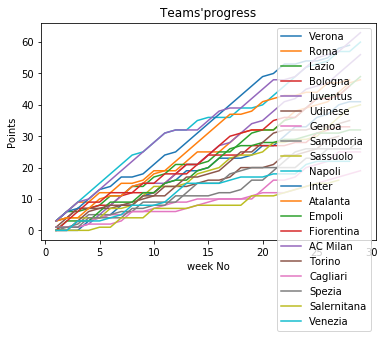

In [30]:
comulativeScore={}
teams_name = []

for team in teams.items():
    comulativeScore[team[1]]=list(np.cumsum(dataframes[team[1]]['pts']))
    teams_name.append(team[1])
df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in comulativeScore.items()]))
df['Week No'] = [i+1 for i in range(df.shape[0])]    
df.fillna(method='ffill')   

#plot 
for col in df.columns:
    if not col == 'Week No':
        plt.plot(df['Week No'], df[col], label=col)

plt.legend()
plt.title('Teams\'progress')
plt.xlabel('week No')
plt.ylabel('Points')
plt.show()

<dt> Team's position in each week <dt>


1. A team's position calculated by point
2. For teams with equal points,  the difference between their scored and missed is considered
3. If the two above parameters were identical for two or more teams, we would consider the total scored. 

<dt> Preparing data <dt>

In [31]:
# Comulative points

performances = []
teams = []
for team, df in dataframes.items():
    comulativepnts = np.cumsum((df['pts']))
    performances.append(list(comulativepnts))
    teams.append(team)
#performances
#teams

performances = pd.DataFrame(performances, index=teams).transpose()  

performances.fillna(method='ffill', inplace=True)
performances.head()

,Verona,Roma,Lazio,Bologna,Juventus,Udinese,Genoa,Sampdoria,Sassuolo,Napoli,Inter,Atalanta,Empoli,Fiorentina,AC Milan,Torino,Cagliari,Spezia,Salernitana,Venezia
0,0.00,3.00,3.00,3.00,1.00,1.00,0.00,0.00,3.00,3.00,3.00,3.00,0.00,0.00,3.00,0.00,1.00,1.00,0.00,0.00
1,0.00,6.00,6.00,4.00,1.00,4.00,0.00,1.00,4.00,6.00,6.00,4.00,3.00,3.00,6.00,0.00,1.00,1.00,0.00,0.00
2,0.00,9.00,6.00,7.00,1.00,7.00,3.00,2.00,4.00,9.00,7.00,4.00,3.00,6.00,9.00,3.00,1.00,1.00,0.00,3.00
3,3.00,9.00,7.00,7.00,2.00,7.00,3.00,5.00,4.00,12.00,10.00,7.00,3.00,9.00,10.00,6.00,2.00,4.00,0.00,3.00
4,4.00,12.00,8.00,8.00,5.00,7.00,4.00,5.00,4.00,15.00,13.00,10.00,6.00,9.00,13.00,7.00,2.00,4.00,1.00,3.00


In [32]:
teams

['Verona',
 'Roma',
 'Lazio',
 'Bologna',
 'Juventus',
 'Udinese',
 'Genoa',
 'Sampdoria',
 'Sassuolo',
 'Napoli',
 'Inter',
 'Atalanta',
 'Empoli',
 'Fiorentina',
 'AC Milan',
 'Torino',
 'Cagliari',
 'Spezia',
 'Salernitana',
 'Venezia']

In [33]:
#performances.iloc[0]

In [34]:
# Comulative Scored and missed differences
s_m_diffs = []
for team, df in dataframes.items():
    comulative_scored = np.cumsum((df['scored']))
    comulative_missed =  np.cumsum((df['missed']))
    s_m_diff = comulative_scored - comulative_missed
    s_m_diffs.append(list(s_m_diff))
s_m_diffs_df = pd.DataFrame(s_m_diffs, index=teams).transpose() 
s_m_diffs_df.fillna(method='ffill', inplace=True)
s_m_diffs_df.head()

,Verona,Roma,Lazio,Bologna,Juventus,Udinese,Genoa,Sampdoria,Sassuolo,Napoli,Inter,Atalanta,Empoli,Fiorentina,AC Milan,Torino,Cagliari,Spezia,Salernitana,Venezia
0,-1.00,2.00,2.00,1.00,0.00,0.00,-4.00,-1.00,1.00,2.00,4.00,1.00,-2.00,-2.00,1.00,-1.00,0.00,0.00,-1.00,-2.00
1,-3.00,6.00,7.00,1.00,-1.00,3.00,-5.00,-1.00,1.00,3.00,6.00,1.00,-1.00,-1.00,4.00,-2.00,-3.00,-5.00,-5.00,-5.00
2,-4.00,7.00,5.00,2.00,-2.00,4.00,-4.00,-1.00,0.00,4.00,6.00,0.00,-2.00,0.00,6.00,2.00,-4.00,-6.00,-9.00,-4.00
3,-3.00,6.00,5.00,-3.00,-2.00,0.00,-5.00,2.00,-1.00,8.00,11.00,1.00,-5.00,1.00,6.00,3.00,-4.00,-5.00,-10.00,-5.00
4,-3.00,7.00,5.00,-3.00,-1.00,-1.00,-5.00,-2.00,-2.00,12.00,13.00,2.00,-3.00,-1.00,8.00,3.00,-6.00,-6.00,-10.00,-7.00


In [35]:
#s_m_diffs_df.iloc[0]

In [36]:
# Comulative Scored 
# We could do this stage in previouse cell; however, for clearity, I put it in a seperated cell
goals = []
for team, df in dataframes.items():
    cumulative_scored = np.cumsum((df['scored']))
    goals.append(list(cumulative_scored))
    
goals_df = pd.DataFrame(goals, index=teams).transpose()
goals_df.fillna(method='ffill', inplace=True)
goals_df.head() 

,Verona,Roma,Lazio,Bologna,Juventus,Udinese,Genoa,Sampdoria,Sassuolo,Napoli,Inter,Atalanta,Empoli,Fiorentina,AC Milan,Torino,Cagliari,Spezia,Salernitana,Venezia
0,2.00,3.00,3.00,3.00,2.00,2.00,0.00,0.00,3.00,2.00,4.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,0.00
1,3.00,7.00,9.00,3.00,2.00,5.00,1.00,0.00,3.00,4.00,7.00,2.00,2.00,3.00,5.00,2.00,3.00,3.00,2.00,0.00
2,3.00,9.00,9.00,4.00,3.00,6.00,4.00,2.00,4.00,6.00,9.00,3.00,3.00,5.00,7.00,6.00,5.00,3.00,2.00,2.00
3,6.00,11.00,11.00,5.00,4.00,6.00,5.00,5.00,4.00,10.00,15.00,4.00,3.00,7.00,8.00,7.00,7.00,5.00,2.00,3.00
4,8.00,12.00,12.00,7.00,7.00,6.00,7.00,5.00,5.00,14.00,18.00,6.00,5.00,8.00,10.00,8.00,7.00,7.00,4.00,3.00


In [37]:
#goal_df.iloc[0]

In [38]:
def weekly_positions(teams, performances, s_m_diffs_df, goals_df ):
    '''This function calculated positions of each team week by week.
    it zips three parameters and sort them based on requied order and return a dataframe containing all positions '''
    Weekly_Position = {team :[] for team in teams}
    #print(Weekly_Position)
    for i in range(len(performances)):
        zipped = list(zip(performances.iloc[i],s_m_diffs_df.iloc[i], goals_df.iloc[i],teams))
        sorted_zipped = sorted(zipped,key= lambda x:x[0:3], reverse=True)
        for j in range(len(sorted_zipped)):
            #print(j)
            Weekly_Position.get(sorted_zipped[j][3]).append(j+1)
            #print(Weekly_Position.get(s[j][3]))
            #print(s[j][3])
        #print('======')
    result = pd.DataFrame(Weekly_Position) 
    return result

In [39]:
positions = weekly_positions(teams, performances, s_m_diffs_df, goals_df )
positions['Week No'] = [i+1 for i in range(positions.shape[0])]
   

In [40]:
positions.head()

,Verona,Roma,Lazio,Bologna,Juventus,Udinese,Genoa,Sampdoria,Sassuolo,Napoli,...,Atalanta,Empoli,Fiorentina,AC Milan,Torino,Cagliari,Spezia,Salernitana,Venezia,Week No
0,13,2,3,5,9,10,20,16,6,4,...,7,17,18,8,15,11,12,14,19,1
1,17,2,1,7,12,6,19,13,8,5,...,9,11,10,4,16,14,15,18,20,2
2,19,1,7,6,16,5,13,15,9,3,...,10,12,8,2,11,17,18,20,14,3
3,14,4,6,9,18,8,15,11,12,1,...,7,16,5,3,10,19,13,20,17,4
4,15,4,7,8,12,10,16,13,14,1,...,5,11,6,3,9,19,17,20,18,5


In [41]:
positions = positions.astype(int)

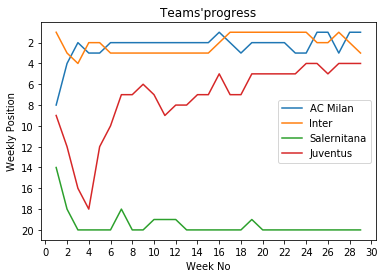

In [42]:
interested_teams = ['AC Milan', 'Inter', 'Salernitana', 'Juventus'] # You can add your favourite team here

for col in positions[interested_teams]:
    plt.plot(positions['Week No'], positions[col], label=col)

plt.legend()
plt.title('Teams\'progress')
plt.xlabel('Week No')
plt.ylabel('Weekly Position')
ax = plt.gca()
plt.locator_params('y',nbins = 20)
plt.locator_params('x',nbins = 30)
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

### Last 5 Games Statics

In [43]:
def last_five_stat(teamName):
    '''This function provides result information about the last 5 games of the desired team'''
    dataframes[teamName][-5:]
    col_disply = ['date', 'result']
    last_five_stat = dataframes[teamName][-5:][col_disply]
    last_five_stat.index.name = 'Game No'
    last_five_stat['date'] = pd.to_datetime(last_five_stat['date']).dt.date
    result = last_five_stat.transpose()
    return result

#Example
last_five_stat('AC Milan')

Game No,24,25,26,27,28
date,2022-02-13,2022-02-19,2022-02-25,2022-03-06,2022-03-12
result,w,d,d,w,w


### Number of Goals per Match

In [44]:
Goals_per_match = sum(full_stat['scored'])/sum(full_stat['matches'])
print('In total, the numbers of goals per match is: {:.2f}'.format(Goals_per_match))

In total, the numbers of goals per match is: 1.45


### Number of Goals per Match for the Desired Team

In [45]:
def goals_per_game(TeamName):
    '''This function calculates number of goals per match for a team'''
    game_no = [x for x in range(1,len(goals_df[TeamName]))]
    zipped = zip(list(goals_df[TeamName]),game_no)
    goals_per_game = [go/ga for go,ga in zipped]
    return goals_per_game, game_no 

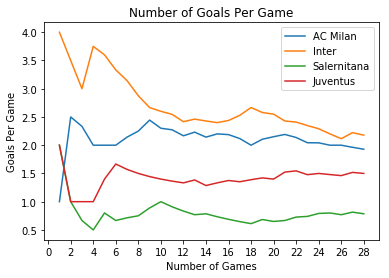

In [46]:
#Run and plot for the list of desied teams

for team in interested_teams:
    goals, games = goals_per_game(team)
    plt.plot(games, goals, label=team)

plt.legend()
plt.title('Number of Goals Per Game')
plt.xlabel('Number of Games')
plt.ylabel('Goals Per Game')

#ax = plt.gca()
plt.locator_params('y',nbins = 10)
plt.locator_params('x',nbins = 15)
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

## More investigation on data

- In the following, I provided some insight into teams' behaviour; I've selected AC Milan for illustration.

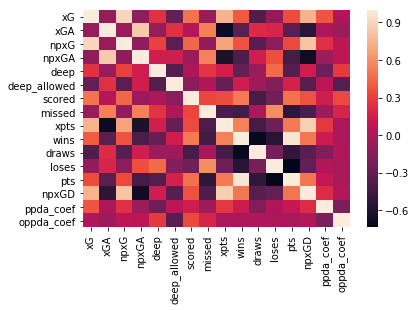

In [47]:
import seaborn as sns
sns.heatmap(dataframes['AC Milan'].corr())
#dataframes['Atalanta'].corr()

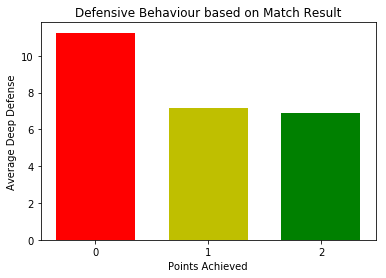

In [48]:
groups = dataframes['AC Milan'].groupby(['pts'])
deep_avg = groups.mean()['deep']
pts = ['0', '1', '2']

plt.bar(pts, deep_avg, width=0.7,color=['r', 'y', 'g'], linewidth=2)

plt.title('Defensive Behaviour based on Match Result')
plt.xlabel('Points Achieved')
plt.ylabel('Average Deep Defense')
plt.show()

- It seems that 'AC Milan' was more defensive in the matches where they lost.

Text(0.5, 1.0, "Team's Behaviour at Home and Away with the result Against Opponent Behaviour")

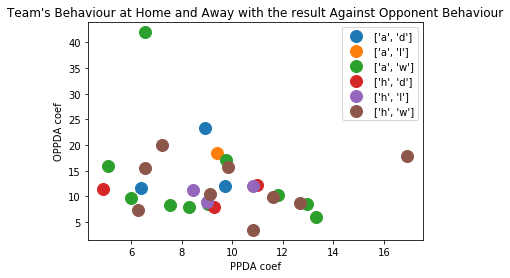

In [49]:
from matplotlib.pyplot import figure

groups = dataframes['AC Milan'].groupby(['h_a','result'])
for (h_a,result), group in groups:
    plt.plot(group.ppda_coef,group.oppda_coef , marker='o', linestyle='', markersize=12, label=[h_a,result])

plt.legend()
plt.xlabel("PPDA coef")
plt.ylabel("OPPDA coef")
plt.title('Team\'s Behaviour at Home and Away with the result Against Opponent Behaviour')


- My intuition was that teams play more defensive when away from home. However, more factors must be involved as the above graph does not indicate a solid pattern. 

Text(0.5, 1.0, 'Team Pressure at Home and Away ')

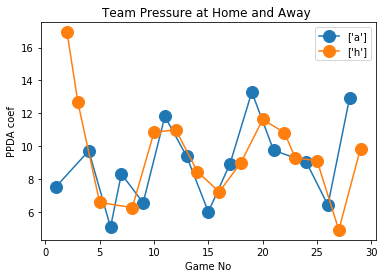

In [50]:
groups = dataframes['AC Milan'].groupby(['h_a'])
for h_a , group in groups:
    plt.plot(group.index+1, group.ppda_coef , marker='o', linestyle='-', markersize=12, label=[h_a])

plt.legend()
plt.xlabel("Game No")
plt.ylabel("PPDA coef")
plt.title('Team Pressure at Home and Away ')